# Predicting the value of houses using Neural Network (while demonstrating the danger of overfitting)

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

tf.random.set_seed(0) # for replicability purposes, not for production

* To see how we can predict a numerical value, we'll go back to our familiar dataset of California homes.

In [2]:
california = fetch_california_housing(as_frame=True)
california.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


* We will split them into training and control data.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, 
                                                    california.target, 
                                                    test_size=0.20,
                                                    random_state=13)

* Remember that we need to normalize the data.

* For this purpose in TensorFlow we can use the special `Normalization' layer.

* We use this by using the `adapt()` method on the training data.

* Then it will read the data and calculate the mean, variance, and number of data, for each column.

In [4]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean.numpy())
    print(normalizer.variance.numpy())
    print(normalizer.count.numpy())

2022-03-02 16:43:14.892378: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[ 3.86e+00  2.87e+01  5.43e+00  1.10e+00  1.43e+03  3.10e+00  3.57e+01
  -1.20e+02]]
[[3.58e+00 1.58e+02 6.53e+00 2.43e-01 1.33e+06 1.34e+02 4.60e+00 4.04e+00]]
16512


* We start with a model with 32 neurons in a hidden layer and one neuron in the output layer.

* We don't give an activation function to the output layer since we want to predict the house price, so get the output of the neuron without forcing it to be in some value limits.

* The loss will be measured based on the Average Absolute Error.

In [5]:
model = keras.Sequential([
        normalizer,
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Let's see it briefly.

* Notice that we have parameters that are not trained: they are the means, the variances, and the number of elements that the `Normalization` layer has already found.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 338
Trainable params: 321
Non-trainable params: 17
_________________________________________________________________


* We will train our model for 100 epochs.

* In each epoch the last 20% of data will be used for validation.

* We will save the training course in a `history` variable.

In [7]:
num_epochs = 100

history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
413/413 [==============================] - 1s 953us/step - loss: 0.8047 - val_loss: 0.5796
Epoch 2/100
413/413 [==============================] - 0s 742us/step - loss: 0.5087 - val_loss: 0.4928
Epoch 3/100
413/413 [==============================] - 0s 754us/step - loss: 0.4637 - val_loss: 0.4640
Epoch 4/100
413/413 [==============================] - 0s 803us/step - loss: 0.4462 - val_loss: 0.4573
Epoch 5/100
413/413 [==============================] - 0s 804us/step - loss: 0.4370 - val_loss: 0.4532
Epoch 6/100
413/413 [==============================] - 0s 781us/step - loss: 0.4323 - val_loss: 0.4418
Epoch 7/100
413/413 [==============================] - 0s 737us/step - loss: 0.4275 - val_loss: 0.4401
Epoch 8/100
413/413 [==============================] - 0s 763us/step - loss: 0.4243 - val_loss: 0.4356
Epoch 9/100
413/413 [==============================] - 0s 731us/step - loss: 0.4203 - val_loss: 0.4366
Epoch 10/100
413/413 [==============================] - 0s 747us/step - l

Epoch 80/100
413/413 [==============================] - 0s 716us/step - loss: 0.3662 - val_loss: 0.3838
Epoch 81/100
413/413 [==============================] - 0s 714us/step - loss: 0.3661 - val_loss: 0.3874
Epoch 82/100
413/413 [==============================] - 0s 760us/step - loss: 0.3661 - val_loss: 0.3872
Epoch 83/100
413/413 [==============================] - 0s 718us/step - loss: 0.3667 - val_loss: 0.3912
Epoch 84/100
413/413 [==============================] - 0s 713us/step - loss: 0.3663 - val_loss: 0.3886
Epoch 85/100
413/413 [==============================] - 0s 736us/step - loss: 0.3665 - val_loss: 0.3818
Epoch 86/100
413/413 [==============================] - 0s 742us/step - loss: 0.3667 - val_loss: 0.3835
Epoch 87/100
413/413 [==============================] - 0s 711us/step - loss: 0.3653 - val_loss: 0.3844
Epoch 88/100
413/413 [==============================] - 0s 707us/step - loss: 0.3650 - val_loss: 0.3840
Epoch 89/100
413/413 [==============================] - 0s 723us

* Our training path shows the progress in training loss and validation loss, in each epoch.

In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,0.804669,0.579563,0
1,0.508653,0.492838,1
2,0.463731,0.463953,2
3,0.446166,0.457256,3
4,0.436963,0.453202,4
...,...,...,...
95,0.364285,0.379836,95
96,0.363797,0.385798,96
97,0.363622,0.382892,97
98,0.363429,0.381474,98


* We can see the progress if we make a helper function for the visualization.

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

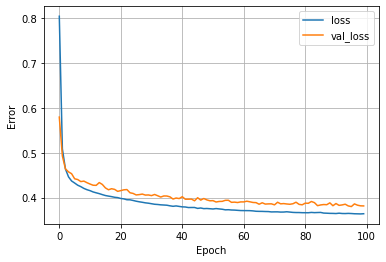

In [10]:
plot_loss(history)

* We see that the validation loss deviates from the training loss.

* This may be an example of overfitting.

* We evaluate our model against control data.

In [11]:
model.evaluate(X_test, y_test, verbose=0)

0.38195157051086426

* Let's see if we do better with a bigger network.

In [12]:
model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* In summary:

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                576       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,706
Trainable params: 2,689
Non-trainable params: 17
_________________________________________________________________


* We train:

In [14]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
413/413 [==============================] - 1s 1ms/step - loss: 0.6449 - val_loss: 0.4896
Epoch 2/100
413/413 [==============================] - 0s 991us/step - loss: 0.4441 - val_loss: 0.4435
Epoch 3/100
413/413 [==============================] - 0s 1ms/step - loss: 0.4193 - val_loss: 0.4303
Epoch 4/100
413/413 [==============================] - 0s 1ms/step - loss: 0.4076 - val_loss: 0.4201
Epoch 5/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3938 - val_loss: 0.4078
Epoch 6/100
413/413 [==============================] - 0s 864us/step - loss: 0.3837 - val_loss: 0.3935
Epoch 7/100
413/413 [==============================] - 0s 942us/step - loss: 0.3773 - val_loss: 0.3977
Epoch 8/100
413/413 [==============================] - 0s 896us/step - loss: 0.3735 - val_loss: 0.3829
Epoch 9/100
413/413 [==============================] - 0s 854us/step - loss: 0.3676 - val_loss: 0.3803
Epoch 10/100
413/413 [==============================] - 0s 991us/step - loss: 0.3

Epoch 80/100
413/413 [==============================] - 0s 996us/step - loss: 0.3097 - val_loss: 0.3406
Epoch 81/100
413/413 [==============================] - 0s 904us/step - loss: 0.3116 - val_loss: 0.3434
Epoch 82/100
413/413 [==============================] - 0s 896us/step - loss: 0.3089 - val_loss: 0.3410
Epoch 83/100
413/413 [==============================] - 0s 879us/step - loss: 0.3100 - val_loss: 0.3358
Epoch 84/100
413/413 [==============================] - 0s 850us/step - loss: 0.3092 - val_loss: 0.3440
Epoch 85/100
413/413 [==============================] - 0s 850us/step - loss: 0.3094 - val_loss: 0.3382
Epoch 86/100
413/413 [==============================] - 0s 867us/step - loss: 0.3080 - val_loss: 0.3424
Epoch 87/100
413/413 [==============================] - 0s 879us/step - loss: 0.3089 - val_loss: 0.3364
Epoch 88/100
413/413 [==============================] - 0s 880us/step - loss: 0.3090 - val_loss: 0.3388
Epoch 89/100
413/413 [==============================] - 0s 852us

* His assessment:

In [16]:
model.evaluate(X_test, y_test, verbose=0)

0.3384447693824768

* We did better, but the two losses started to diverge earlier.

* Also, validation loss doesn't seem to improve significantly from one point on.

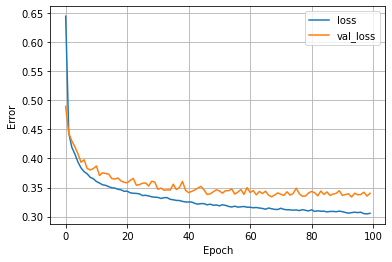

In [17]:
plot_loss(history)

* We did better, but the two losses started to diverge earlier.

* Also, validation loss doesn't seem to improve significantly from one point on.

In [18]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

* We rebuild our model.

In [19]:
model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* This time we give it the early termination rule via the `callbacks` parameter.

In [20]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5950 - val_loss: 0.4631
Epoch 2/100
413/413 [==============================] - 0s 1ms/step - loss: 0.4354 - val_loss: 0.4421
Epoch 3/100
413/413 [==============================] - 0s 1ms/step - loss: 0.4186 - val_loss: 0.4324
Epoch 4/100
413/413 [==============================] - 0s 1ms/step - loss: 0.4115 - val_loss: 0.4242
Epoch 5/100
413/413 [==============================] - 0s 951us/step - loss: 0.4023 - val_loss: 0.4149
Epoch 6/100
413/413 [==============================] - 0s 915us/step - loss: 0.3943 - val_loss: 0.4066
Epoch 7/100
413/413 [==============================] - 0s 907us/step - loss: 0.3884 - val_loss: 0.4101
Epoch 8/100
413/413 [==============================] - 0s 857us/step - loss: 0.3839 - val_loss: 0.3975
Epoch 9/100
413/413 [==============================] - 0s 859us/step - loss: 0.3796 - val_loss: 0.3927
Epoch 10/100
413/413 [==============================] - 0s 904us/step - loss: 0.3

* Indeed, we stopped before the 80 seasons.

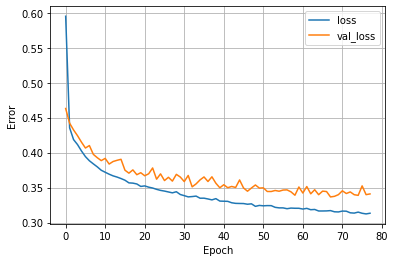

In [21]:
plot_loss(history)

* The performance of the model was not significantly affected.

In [22]:
model.evaluate(X_test, y_test, verbose=0)

0.3434012532234192

* Let's then make an even bigger model and see if we can do even better.

In [23]:
model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* We train:

In [24]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 [==============================] - 1s 1ms/step - loss: 0.5739 - val_loss: 0.4513
Epoch 2/100
413/413 [==============================] - 0s 1ms/step - loss: 0.4288 - val_loss: 0.4314
Epoch 3/100
413/413 [==============================] - 0s 1ms/step - loss: 0.4125 - val_loss: 0.4230
Epoch 4/100
413/413 [==============================] - 0s 941us/step - loss: 0.4020 - val_loss: 0.4321
Epoch 5/100
413/413 [==============================] - 0s 952us/step - loss: 0.3878 - val_loss: 0.3997
Epoch 6/100
413/413 [==============================] - 0s 935us/step - loss: 0.3787 - val_loss: 0.3862
Epoch 7/100
413/413 [==============================] - 0s 949us/step - loss: 0.3718 - val_loss: 0.3965
Epoch 8/100
413/413 [==============================] - 0s 958us/step - loss: 0.3676 - val_loss: 0.3756
Epoch 9/100
413/413 [==============================] - 0s 908us/step - loss: 0.3620 - val_loss: 0.3777
Epoch 10/100
413/413 [==============================] - 0s 934us/step - loss: 0

* The deviation between losses grew even more.

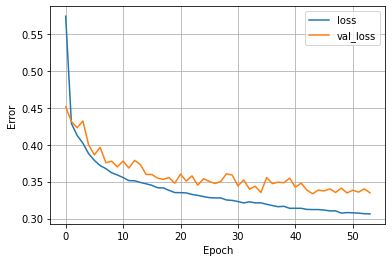

In [25]:
plot_loss(history)

* The performance remained at the same levels.

In [26]:
model.evaluate(X_test, y_test, verbose=0)

0.33250880241394043

* And if we grow it even further?

In [27]:
model = keras.Sequential([
        normalizer,
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* We train:

In [28]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 [==============================] - 1s 1ms/step - loss: 0.5213 - val_loss: 0.4465
Epoch 2/100
413/413 [==============================] - 1s 1ms/step - loss: 0.4197 - val_loss: 0.4157
Epoch 3/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3938 - val_loss: 0.3961
Epoch 4/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3803 - val_loss: 0.4002
Epoch 5/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3708 - val_loss: 0.3876
Epoch 6/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3621 - val_loss: 0.3805
Epoch 7/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3599 - val_loss: 0.3767
Epoch 8/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3555 - val_loss: 0.3645
Epoch 9/100
413/413 [==============================] - 1s 1ms/step - loss: 0.3513 - val_loss: 0.3792
Epoch 10/100
413/413 [==============================] - 0s 1ms/step - loss: 0.3440 - val_lo

* Εδώ κι αν μεγάλωσε η απόκλιση!

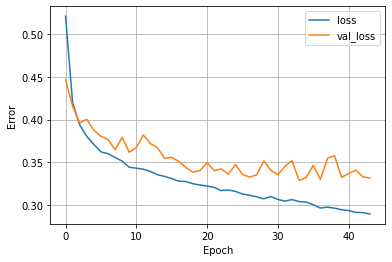

In [29]:
plot_loss(history)

* And the performance at the same (or rather subtly worse).

In [30]:
model.evaluate(X_test, y_test, verbose=0)

0.33307990431785583

* Why is this happening?

* Let's look at the model.

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_11 (Dense)            (None, 256)               2304      
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 43,538
Trainable params: 43,521
Non-trainable params: 17
_________________________________________________

* We have built a model that has more parameters than our samples.

* The model is too robust for the data at our disposal.

* Such a model may fall victim to overfitting.

In [32]:
model.count_params()

43538

* Attention! When we build neural networks, we don't add blind layers and neurons.

* Ultimately what we will achieve is to build a network with so many neurons and connections that it will very quickly start parroting the data.

* We need to size the network based on the data volume of our problem.

* The results are similar (maybe a little worse, but we didn't look for hyperparameters) to what we achieved through decision trees.

* As we can see though, training neural networks may need more resources.

* Also as we can see, we do not have the interpretability that we can have with other methods.